In [508]:
import pandas as pd
import re
import sys
import importlib.util
import itertools
import matplotlib.pyplot as plt
import seaborn as sns


In [509]:
df = pd.read_csv('data/mergedData.csv')

In [510]:
df.head()

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,class
0,ر ه م,Z H R,ر,ه,م,R,H,Z,9777,6500,NaN
1,ر ه م,Z H R,ر,ه,م,R,H,Z,9888,6500,NaN
2,ر ه م,Z H R,ر,ه,م,R,H,Z,9666,6500,NaN
3,ر أ ن,N A R,ر,أ,ن,R,A,N,3,35000,NaN
4,ه ر ب,B R H,ه,ر,ب,H,R,B,22,50000,NaN


In [511]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3690 entries, 0 to 3689
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   char_ar   3690 non-null   object
 1   char_en   3690 non-null   object
 2   char1_ar  3690 non-null   object
 3   char2_ar  3685 non-null   object
 4   char3_ar  3677 non-null   object
 5   char1_en  3690 non-null   object
 6   char2_en  3685 non-null   object
 7   char3_en  3677 non-null   object
 8   plate_no  3690 non-null   int64 
 9   price     3690 non-null   int64 
 10  class     54 non-null     object
dtypes: int64(2), object(9)
memory usage: 317.2+ KB


In [512]:
df['plate_no'] = df['plate_no'].astype(str)

# Digit Features eng

## EDA to Analyze and Discover Digit Features

### df with one digit

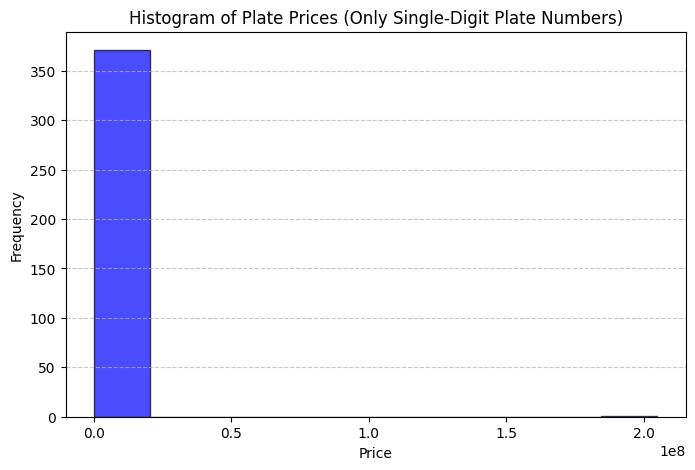

In [513]:
# Filter data to include only rows where plate_no is a single digit
one_digit = df[df["plate_no"].str.match(r"^\d$")]

# Plot histogram of prices
plt.figure(figsize=(8, 5))
plt.hist(one_digit["price"], bins=10, color="blue", alpha=0.7, edgecolor="black")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of Plate Prices (Only Single-Digit Plate Numbers)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [514]:
df[df["plate_no"].str.match(r"^\d$")]

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,class
3,ر أ ن,N A R,ر,أ,ن,R,A,N,3,35000,NaN
13,أ م ل,L Z A,أ,م,ل,A,Z,L,2,85000,NaN
28,د ط د,D T D,د,ط,د,D,T,D,2,115000,NaN
48,ك ح أ,A J K,ك,ح,أ,K,J,A,7,75000,NaN
56,ص ل م,Z L X,ص,ل,م,X,L,Z,9,69000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3594,و ق ن,N G U,و,ق,ن,U,G,N,5,60000,NaN
3677,أ ن ق,G N A,أ,ن,ق,A,N,G,3,1000000,NaN
3679,ق ى ل,L V G,ق,ى,ل,G,V,L,8,40000,NaN
3686,د ص ع,E X D,د,ص,ع,D,X,E,2,40000,NaN


In [515]:
# Checking minimum and maximum price for one-digit plate_no
one_digit['price'].min(), one_digit['price'].max()

(1, 205000000)

### Two-digit df

Same-two-digit df

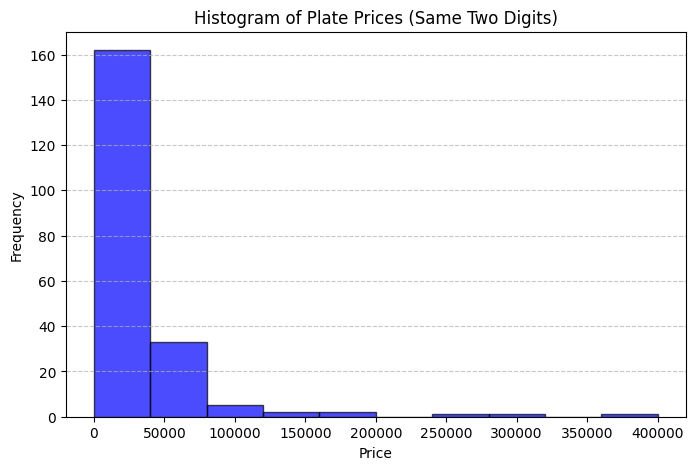

In [516]:
# Filter data to include only rows where plate_no has two digits
same_two_digits = df[df["plate_no"].str.match(r"^(\d)\1$")]

# Plot histogram of prices
plt.figure(figsize=(8, 5))
plt.hist(same_two_digits["price"], bins=10, color="blue", alpha=0.7, edgecolor="black")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of Plate Prices (Same Two Digits)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [517]:
df[df["plate_no"].str.match(r"^(\d)\1$")]

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,class
4,ه ر ب,B R H,ه,ر,ب,H,R,B,22,50000,NaN
9,ص ى ن,N V X,ص,ى,ن,X,V,N,11,55000,NaN
15,د ص ط,T X D,د,ص,ط,D,X,T,77,16000,NaN
29,ه ن ص,X N H,ه,ن,ص,H,N,X,55,30000,NaN
36,ى ص ح,J X V,ى,ص,ح,V,X,J,11,33000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3560,ه ح ه,H J H,ه,ح,ه,H,J,H,22,32000,NaN
3577,ب س ط,T S B,ب,س,ط,B,S,T,99,27000,NaN
3587,ر ب ح,J B R,ر,ب,ح,R,B,J,22,2,NaN
3663,م ك ل,L K Z,م,ك,ل,Z,K,L,33,1,NaN


In [518]:
#Checking minimum and maximum price for same-two-digits plates
same_two_digits['price'].min(), same_two_digits['price'].max()

(1, 400000)

Different-two-digit plates

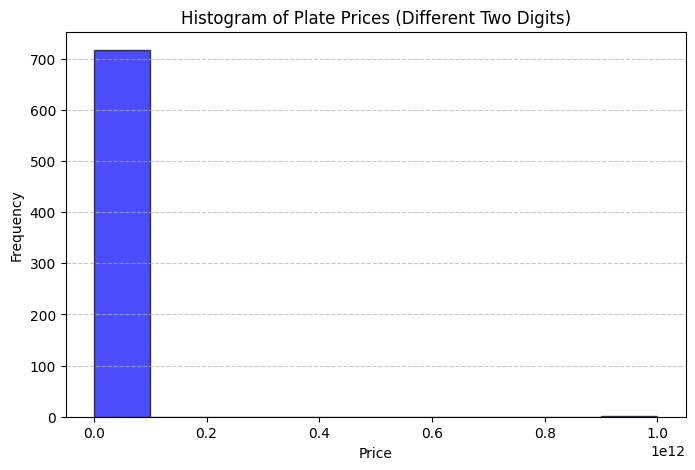

In [519]:
# Filter data to include only rows where plate_no has two different digits
different_two_digits = df[df["plate_no"].str.match(r"^(\d)(?!\1)\d$")]

# Plot histogram of prices
plt.figure(figsize=(8, 5))
plt.hist(different_two_digits["price"], bins=10, color="blue", alpha=0.7, edgecolor="black")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of Plate Prices (Different Two Digits)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [520]:
df[df["plate_no"].str.match(r"^(\d)(?!\1)\d$")]


,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,class
6,أ ر ب,B R A,أ,ر,ب,A,R,B,75,15500,NaN
23,م ع ن,N E Z,م,ع,ن,Z,E,N,52,31000,NaN
27,ب د ل,L D B,ب,د,ل,B,D,L,89,30000,NaN
37,ل ع و,U E L,ل,ع,و,L,E,U,35,10000,NaN
41,و د م,Z D U,و,د,م,U,D,Z,86,15000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3658,ل ب ن,N B L,ل,ب,ن,L,B,N,56,22000,NaN
3659,د ر ه,H R D,د,ر,ه,D,R,H,27,25000,NaN
3660,س ق ط,T G S,س,ق,ط,S,G,T,46,20000,NaN
3670,ر ر س,S R R,ر,ر,س,R,R,S,49,15000,NaN


In [521]:
# Checking minimum and maximum price for different-two-digit plates
different_two_digits['price'].min(), different_two_digits['price'].max()

(1, 999999999999)

In [522]:
different_two_digits[different_two_digits['price'] == 999999999999]

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,class
2746,ه ك ن,N K H,ه,ك,ن,H,K,N,80,999999999999,NaN


### Three-digit plates

Same-three-digit plates

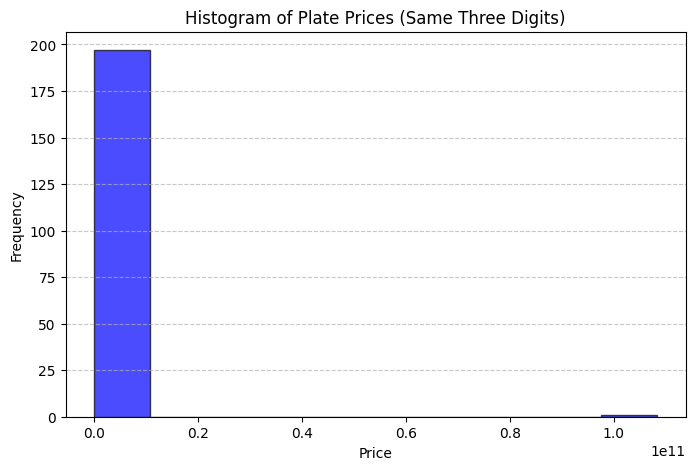

In [523]:
# Filter data to include only rows where plate_no has the same three digits
same_three_digits = df[df["plate_no"].str.match(r"^(\d)\1\1$")]

# Plot histogram of prices
plt.figure(figsize=(8, 5))
plt.hist(same_three_digits["price"], bins=10, color="blue", alpha=0.7, edgecolor="black")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of Plate Prices (Same Three Digits)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [524]:
df[df["plate_no"].str.match(r"^(\d)\1\1$")]

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,class
24,ط ك ل,L K T,ط,ك,ل,T,K,L,444,20500,NaN
51,س ى أ,A V S,س,ى,أ,S,V,A,555,25000,NaN
55,ح ك ن,N K J,ح,ك,ن,J,K,N,111,40000,NaN
71,ل و ه,H U L,ل,و,ه,L,U,H,666,45000,NaN
87,س ه ق,G H S,س,ه,ق,S,H,G,111,31000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3602,ص س ر,R S X,ص,س,ر,X,S,R,555,13000,NaN
3621,أ ر ك,K R A,أ,ر,ك,A,R,K,777,30000,NaN
3622,ح ى ل,L V J,ح,ى,ل,J,V,L,111,100000,NaN
3627,س ق ى,V G S,س,ق,ى,S,G,V,222,29,NaN


In [525]:
# Checking minimum and maximum price for same-three-digit df
same_three_digits['price'].min(), same_three_digits['price'].max()

(1, 108446043404)

Different-three-digits df

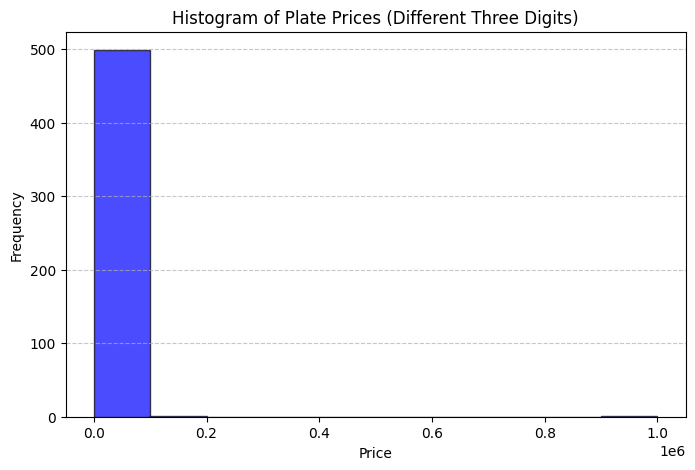

In [526]:
# Filter data to include only rows where plate_no has different three digits
different_three_digits = df[df["plate_no"].str.match(r"^(\d)(?!\1)(\d)(?!\1|\2)\d$")]

# Plot histogram of prices
plt.figure(figsize=(8, 5))
plt.hist(different_three_digits["price"], bins=10, color="blue", alpha=0.7, edgecolor="black")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of Plate Prices (Different Three Digits)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [527]:
different_three_digits

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,class
7,ع ر ب,B R E,ع,ر,ب,E,R,B,167,12000,NaN
25,ك ك ك,K K K,ك,ك,ك,K,K,K,789,25000,NaN
30,م ل ك,K L Z,م,ل,ك,Z,L,K,531,20000,NaN
31,ع و ن,N U E,ع,و,ن,E,U,N,570,20000,NaN
34,س ه و,U H S,س,ه,و,S,H,U,501,22000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3672,س أ ل,L A S,س,أ,ل,S,A,L,740,3500,NaN
3674,ر ر و,U R R,ر,ر,و,R,R,U,174,4000,NaN
3675,ب ل د,D L B,ب,ل,د,B,L,D,345,10,NaN
3680,ب ه أ,A H B,ب,ه,أ,B,H,A,264,7000,NaN


In [528]:
# Checking minimum and maximum price for different-three-digit df
different_three_digits['price'].min(), different_three_digits['price'].max()

(1, 1000000)

### Four-digit df

Same-four-digit df

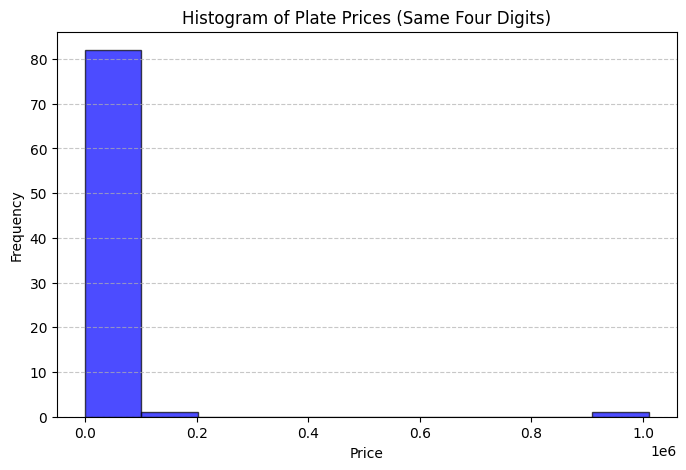

In [529]:
# Filter data to include only rows where plate_no has the same three digits
same_four_digits = df[df["plate_no"].str.match(r"^(\d)\1\1\1$")]

# Plot histogram of prices
plt.figure(figsize=(8, 5))
plt.hist(same_four_digits["price"], bins=10, color="blue", alpha=0.7, edgecolor="black")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of Plate Prices (Same Four Digits)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [530]:
same_four_digits

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,class
45,أ أ ح,J A A,أ,أ,ح,A,A,J,5555,60000,NaN
79,أ ط ل,L T A,أ,ط,ل,A,T,L,1111,50000,NaN
111,ب ع ح,J E B,ب,ع,ح,B,E,J,4444,15000,NaN
161,ر س ط,T S R,ر,س,ط,R,S,T,2222,18500,NaN
162,ح ح ق,G J J,ح,ح,ق,J,J,G,3333,28000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3378,د ب ك,K B D,د,ب,ك,D,B,K,8888,20000,NaN
3399,أ ن ع,E N A,أ,ن,ع,A,N,E,9999,21000,NaN
3434,ر ح ر,R J R,ر,ح,ر,R,J,R,3333,25000,NaN
3439,ر ق ر,R G R,ر,ق,ر,R,G,R,8888,1,NaN


In [531]:
# Checking minimum and maximum price for same-four-digit df
same_four_digits['price'].min(), same_four_digits['price'].max()

(1, 1010101)

Different-four-digit plate

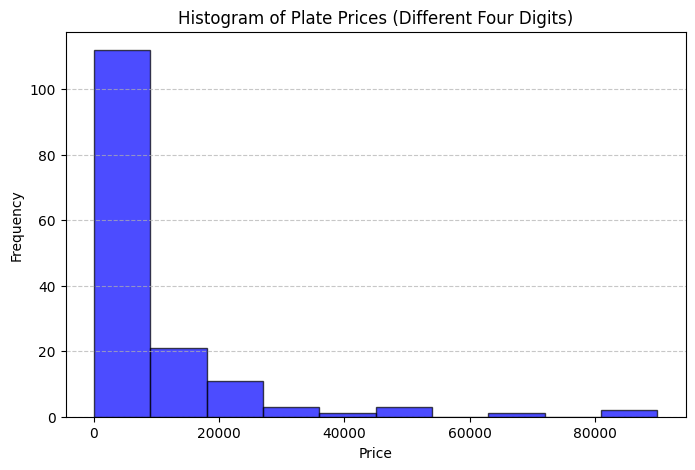

In [532]:
# Filter data to include only rows where plate_no has different four digits
different_four_digits = df[df["plate_no"].str.match(r"^(\d)(?!\1)(\d)(?!\1|\2)(\d)(?!\1|\2|\3)\d$")]

# Plot histogram of prices
plt.figure(figsize=(8, 5))
plt.hist(different_four_digits["price"], bins=10, color="blue", alpha=0.7, edgecolor="black")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of Plate Prices (Different Four Digits)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [533]:
different_four_digits

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,class
10,ح ر ب,B R J,ح,ر,ب,J,R,B,7159,5000,NaN
20,ب د ر,R D B,ب,د,ر,B,D,R,6379,5500,NaN
72,س ع د,D E S,س,ع,د,S,E,D,9710,4000,NaN
77,أ س د,D S A,أ,س,د,A,S,D,9320,34000,NaN
93,ر ه ص,X H R,ر,ه,ص,R,H,X,3720,2000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3582,ح أ م,Z A J,ح,أ,م,J,A,Z,4321,8000,NaN
3590,ح م د,D Z J,ح,م,د,J,Z,D,9240,3000,NaN
3600,ح ل م,Z L J,ح,ل,م,J,L,Z,6490,5000,NaN
3617,ح ر ب,B R J,ح,ر,ب,J,R,B,5360,5000,NaN


In [534]:
# Checking price for different-digit-df
different_four_digits['price'].min(), different_four_digits['price'].max()

(1, 90000)

Average / mode price for all the cases

In [535]:
# Define regex patterns for different plate types
patterns = {
    "One Digit": r"^\d$",
    "Two Digits (Same)": r"^(\d)\1$",
    "Two Digits (Different)": r"^(\d)(?!\1)\d$",
    "Three Digits (Same)": r"^(\d)\1\1$",
    "Three Digits (Different)": r"^(\d)(?!\1)(\d)(?!\1|\2)\d$",
    "Four Digits (Same)": r"^(\d)\1\1\1$",
    "Four Digits (Different)": r"^(\d)(?!\1)(\d)(?!\1|\2)(\d)(?!\1|\2|\3)\d$"
}

avg_prices = {}
for category, pattern in patterns.items():
    filtered_df = df[df["plate_no"].str.match(pattern)]
    avg_prices[category] = int(filtered_df["price"].mean() or 0)  # Convert to int, set to 0 if NaN

# Convert dictionary to DataFrame
avg_prices_df = pd.DataFrame(list(avg_prices.items()), columns=["Category", "Average Price"])

Average with outliers

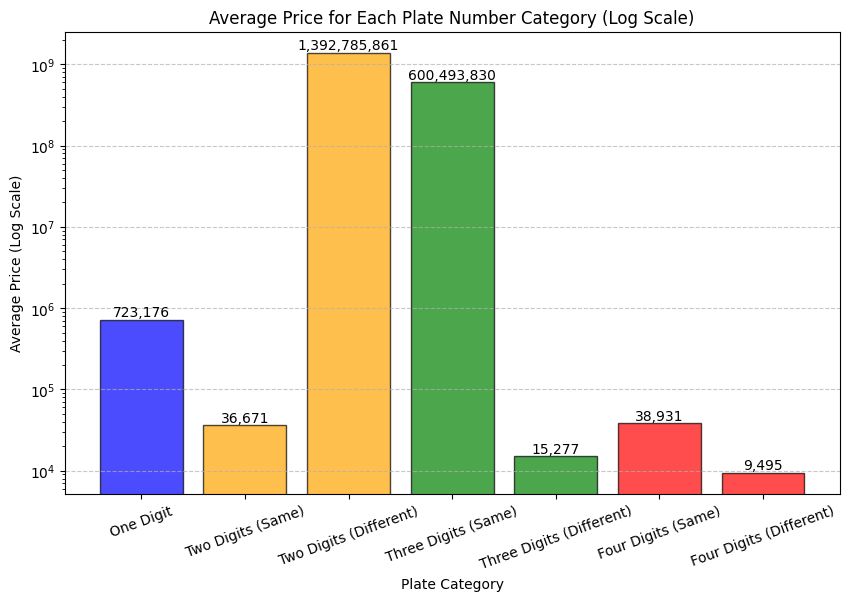

In [536]:

# Data from your message
categories = avg_prices_df['Category']
values = avg_prices_df['Average Price']

# Colors for different categories
colors = ["blue", "orange", "orange", "green", "green", "red", "red"]

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color=colors, alpha=0.7, edgecolor="black")

# Apply logarithmic scale to fix visualization issues
plt.yscale("log")

# Label each bar with its value
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, value, f'{value:,}', 
            ha='center', va='bottom', fontsize=10)

# Formatting
plt.xlabel("Plate Category")
plt.ylabel("Average Price (Log Scale)")
plt.title("Average Price for Each Plate Number Category (Log Scale)")
plt.xticks(rotation=20)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


---

Without outliers

In [537]:
# Calculate the Z-scores for the 'price' column
z_scores = (df['price'] - df['price'].mean()) / df['price'].std()

# Filter out rows where the Z-score is greater than 3 or less than -3
df_no_outliers = df[abs(z_scores) <= 3]


In [538]:
avg_prices_df

,Category,Average Price
0,One Digit,723176
1,Two Digits (Same),36671
2,Two Digits (Different),1392785861
3,Three Digits (Same),600493830
4,Three Digits (Different),15277
5,Four Digits (Same),38931
6,Four Digits (Different),9495


----

## Feature Engineering

In [539]:
df.head()

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,class
0,ر ه م,Z H R,ر,ه,م,R,H,Z,9777,6500,NaN
1,ر ه م,Z H R,ر,ه,م,R,H,Z,9888,6500,NaN
2,ر ه م,Z H R,ر,ه,م,R,H,Z,9666,6500,NaN
3,ر أ ن,N A R,ر,أ,ن,R,A,N,3,35000,NaN
4,ه ر ب,B R H,ه,ر,ب,H,R,B,22,50000,NaN


In [540]:
df[df['plate_no'] == '1234']

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,class
702,ر ن أ,A N R,ر,ن,أ,R,N,A,1234,10000,NaN
931,ر ع ع,E E R,ر,ع,ع,R,E,E,1234,4000,NaN
2913,س ق ب,B G S,س,ق,ب,S,G,B,1234,1000,NaN
3428,ح ل ك,K L J,ح,ل,ك,J,L,K,1234,20000,NaN


1. The Length/Number of Digits in a plate

In [541]:
df['plate_no_length'] = df['plate_no'].map(lambda x : len(x))

In [542]:
df.head(10)

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,class,plate_no_length
0,ر ه م,Z H R,ر,ه,م,R,H,Z,9777,6500,NaN,4
1,ر ه م,Z H R,ر,ه,م,R,H,Z,9888,6500,NaN,4
2,ر ه م,Z H R,ر,ه,م,R,H,Z,9666,6500,NaN,4
3,ر أ ن,N A R,ر,أ,ن,R,A,N,3,35000,NaN,1
4,ه ر ب,B R H,ه,ر,ب,H,R,B,22,50000,NaN,2
5,ر ه م,Z H R,ر,ه,م,R,H,Z,9966,6500,NaN,4
6,أ ر ب,B R A,أ,ر,ب,A,R,B,75,15500,NaN,2
7,ع ر ب,B R E,ع,ر,ب,E,R,B,167,12000,NaN,3
8,ر و ح,J U R,ر,و,ح,R,U,J,775,20000,NaN,3
9,ص ى ن,N V X,ص,ى,ن,X,V,N,11,55000,NaN,2


2. similar digits feature

In [543]:
def is_all_same(plate):
    return len(set(plate)) == 1

In [544]:
df['similar_digits'] = df['plate_no'].apply(is_all_same)

In [545]:
df

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,class,plate_no_length,similar_digits
0,ر ه م,Z H R,ر,ه,م,R,H,Z,9777,6500,NaN,4,False
1,ر ه م,Z H R,ر,ه,م,R,H,Z,9888,6500,NaN,4,False
2,ر ه م,Z H R,ر,ه,م,R,H,Z,9666,6500,NaN,4,False
3,ر أ ن,N A R,ر,أ,ن,R,A,N,3,35000,NaN,1,True
4,ه ر ب,B R H,ه,ر,ب,H,R,B,22,50000,NaN,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3685,ه م ن,N Z H,ه,م,ن,H,Z,N,203,20000,NaN,3,False
3686,د ص ع,E X D,د,ص,ع,D,X,E,2,40000,NaN,1,True
3687,ب ى ى,V V B,ب,ى,ى,B,V,V,505,50000,NaN,3,False
3688,ر ع ب,B E R,ر,ع,ب,R,E,B,3533,15000,NaN,4,False


3. Special date feature

In [546]:
def is_special_date(plate_no):
    if 1980 <= int(plate_no) <= 2030:
        return True
    else:
        return False

In [547]:
df[df['plate_no'] == '2030']

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,class,plate_no_length,similar_digits
416,ر ح ل,L J R,ر,ح,ل,R,J,L,2030,350000,NaN,4,False
553,د أ أ,A A D,د,أ,أ,D,A,A,2030,20000,NaN,4,False
642,ر و و,U U R,ر,و,و,R,U,U,2030,7500,NaN,4,False
942,ب ن م,Z N B,ب,ن,م,B,N,Z,2030,4000,NaN,4,False
1482,ر ح ل,L J R,ر,ح,ل,R,J,L,2030,350000,NaN,4,False
1529,أ س س,S S A,أ,س,س,A,S,S,2030,300000,NaN,4,False
1643,ح ر ب,B R J,ح,ر,ب,J,R,B,2030,100000,NaN,4,False
2925,ح ر ق,G R J,ح,ر,ق,J,R,G,2030,15000,NaN,4,False
3098,ب ل ع,E L B,ب,ل,ع,B,L,E,2030,15000,NaN,4,False
3410,د ل س,S L D,د,ل,س,D,L,S,2030,10000,NaN,4,False


In [548]:
df['sepcial_date'] = df['plate_no'].apply(is_special_date)

In [549]:
df.head()

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,class,plate_no_length,similar_digits,sepcial_date
0,ر ه م,Z H R,ر,ه,م,R,H,Z,9777,6500,NaN,4,False,False
1,ر ه م,Z H R,ر,ه,م,R,H,Z,9888,6500,NaN,4,False,False
2,ر ه م,Z H R,ر,ه,م,R,H,Z,9666,6500,NaN,4,False,False
3,ر أ ن,N A R,ر,أ,ن,R,A,N,3,35000,NaN,1,True,False
4,ه ر ب,B R H,ه,ر,ب,H,R,B,22,50000,NaN,2,True,False


4. Saudi tribes feature

In [550]:
saudi_tribes = ['07', '101', '111', '205', '305', '404', '405', '411', '501',
                '502', '504','505', '507', '509', '511', '513', '514', '516', '517',
                '518', '523', '555', '601', '702', '707', '711', '812', '906','909', '911']

In [551]:
df['saudi_tribes'] = df['plate_no'].isin(saudi_tribes)

In [552]:
df.head()

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,class,plate_no_length,similar_digits,sepcial_date,saudi_tribes
0,ر ه م,Z H R,ر,ه,م,R,H,Z,9777,6500,NaN,4,False,False,False
1,ر ه م,Z H R,ر,ه,م,R,H,Z,9888,6500,NaN,4,False,False,False
2,ر ه م,Z H R,ر,ه,م,R,H,Z,9666,6500,NaN,4,False,False,False
3,ر أ ن,N A R,ر,أ,ن,R,A,N,3,35000,NaN,1,True,False,False
4,ه ر ب,B R H,ه,ر,ب,H,R,B,22,50000,NaN,2,True,False,False


In [553]:
df[df['saudi_tribes'] == True]

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,class,plate_no_length,similar_digits,sepcial_date,saudi_tribes
34,س ه و,U H S,س,ه,و,S,H,U,501,22000,NaN,3,False,False,True
51,س ى أ,A V S,س,ى,أ,S,V,A,555,25000,NaN,3,True,False,True
55,ح ك ن,N K J,ح,ك,ن,J,K,N,111,40000,NaN,3,True,False,True
63,ب س م,Z S B,ب,س,م,B,S,Z,911,100000,NaN,3,False,False,True
87,س ه ق,G H S,س,ه,ق,S,H,G,111,31000,NaN,3,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3602,ص س ر,R S X,ص,س,ر,X,S,R,555,13000,NaN,3,True,False,True
3622,ح ى ل,L V J,ح,ى,ل,J,V,L,111,100000,NaN,3,True,False,True
3652,ع ل و,U L E,ع,ل,و,E,L,U,404,25000,NaN,3,False,False,True
3661,ق ه ق,G H G,ق,ه,ق,G,H,G,505,1,NaN,3,False,False,True


5. in detail number of digits

In [554]:
# Define regex patterns for different plate types
patterns = {
    "One Digit": r"^\d$",
    "Two Digits (Same)": r"^(\d)\1$",
    "Two Digits (Different)": r"^(\d)(?!\1)\d$",
    "Three Digits (Same)": r"^(\d)\1\1$",
    "Three Digits (Different)": r"^(\d)(?!\1)(\d)(?!\1|\2)\d$",
    "Four Digits (Same)": r"^(\d)\1\1\1$",
    "Four Digits (Different)": r"^(\d)(?!\1)(\d)(?!\1|\2)(\d)(?!\1|\2|\3)\d$"
}

In [555]:
for name, pattern in patterns.items():
    df[name] = df["plate_no"].astype(str).apply(lambda x: bool(re.match(pattern, x)))

In [556]:
df

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,class,plate_no_length,similar_digits,sepcial_date,saudi_tribes,One Digit,Two Digits (Same),Two Digits (Different),Three Digits (Same),Three Digits (Different),Four Digits (Same),Four Digits (Different)
0,ر ه م,Z H R,ر,ه,م,R,H,Z,9777,6500,NaN,4,False,False,False,False,False,False,False,False,False,False
1,ر ه م,Z H R,ر,ه,م,R,H,Z,9888,6500,NaN,4,False,False,False,False,False,False,False,False,False,False
2,ر ه م,Z H R,ر,ه,م,R,H,Z,9666,6500,NaN,4,False,False,False,False,False,False,False,False,False,False
3,ر أ ن,N A R,ر,أ,ن,R,A,N,3,35000,NaN,1,True,False,False,True,False,False,False,False,False,False
4,ه ر ب,B R H,ه,ر,ب,H,R,B,22,50000,NaN,2,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3685,ه م ن,N Z H,ه,م,ن,H,Z,N,203,20000,NaN,3,False,False,False,False,False,False,False,True,False,False
3686,د ص ع,E X D,د,ص,ع,D,X,E,2,40000,NaN,1,True,False,False,True,False,False,False,False,False,False
3687,ب ى ى,V V B,ب,ى,ى,B,V,V,505,50000,NaN,3,False,False,True,False,False,False,False,False,False,False
3688,ر ع ب,B E R,ر,ع,ب,R,E,B,3533,15000,NaN,4,False,False,False,False,False,False,False,False,False,False


6. Emergency numbers

In [557]:
saudi_emergency_numbers = ["999", "997", "998", "993", "911", "996", "994", "933", "937", "930", "989", "991"]

In [558]:
df['emergency_no'] = df['plate_no'].isin(saudi_emergency_numbers)

In [559]:
df

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,class,plate_no_length,similar_digits,sepcial_date,saudi_tribes,One Digit,Two Digits (Same),Two Digits (Different),Three Digits (Same),Three Digits (Different),Four Digits (Same),Four Digits (Different),emergency_no
0,ر ه م,Z H R,ر,ه,م,R,H,Z,9777,6500,NaN,4,False,False,False,False,False,False,False,False,False,False,False
1,ر ه م,Z H R,ر,ه,م,R,H,Z,9888,6500,NaN,4,False,False,False,False,False,False,False,False,False,False,False
2,ر ه م,Z H R,ر,ه,م,R,H,Z,9666,6500,NaN,4,False,False,False,False,False,False,False,False,False,False,False
3,ر أ ن,N A R,ر,أ,ن,R,A,N,3,35000,NaN,1,True,False,False,True,False,False,False,False,False,False,False
4,ه ر ب,B R H,ه,ر,ب,H,R,B,22,50000,NaN,2,True,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3685,ه م ن,N Z H,ه,م,ن,H,Z,N,203,20000,NaN,3,False,False,False,False,False,False,False,True,False,False,False
3686,د ص ع,E X D,د,ص,ع,D,X,E,2,40000,NaN,1,True,False,False,True,False,False,False,False,False,False,False
3687,ب ى ى,V V B,ب,ى,ى,B,V,V,505,50000,NaN,3,False,False,True,False,False,False,False,False,False,False,False
3688,ر ع ب,B E R,ر,ع,ب,R,E,B,3533,15000,NaN,4,False,False,False,False,False,False,False,False,False,False,False


7. in-order consecutive numbers

In [560]:
def in_order(number):
    pattern =  r"^(\d)(?=\1|[2-9])$"
    if isinstance(number, str) and number.isdigit():
        return all(int(number[i]) + 1 == int(number[i + 1]) for i in range(len(number) - 1))
    return False

In [561]:
df['in_order'] = df['plate_no'].apply(in_order)

In [562]:
df

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,class,plate_no_length,similar_digits,sepcial_date,saudi_tribes,One Digit,Two Digits (Same),Two Digits (Different),Three Digits (Same),Three Digits (Different),Four Digits (Same),Four Digits (Different),emergency_no,in_order
0,ر ه م,Z H R,ر,ه,م,R,H,Z,9777,6500,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False
1,ر ه م,Z H R,ر,ه,م,R,H,Z,9888,6500,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False
2,ر ه م,Z H R,ر,ه,م,R,H,Z,9666,6500,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False
3,ر أ ن,N A R,ر,أ,ن,R,A,N,3,35000,NaN,1,True,False,False,True,False,False,False,False,False,False,False,True
4,ه ر ب,B R H,ه,ر,ب,H,R,B,22,50000,NaN,2,True,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3685,ه م ن,N Z H,ه,م,ن,H,Z,N,203,20000,NaN,3,False,False,False,False,False,False,False,True,False,False,False,False
3686,د ص ع,E X D,د,ص,ع,D,X,E,2,40000,NaN,1,True,False,False,True,False,False,False,False,False,False,False,True
3687,ب ى ى,V V B,ب,ى,ى,B,V,V,505,50000,NaN,3,False,False,True,False,False,False,False,False,False,False,False,False
3688,ر ع ب,B E R,ر,ع,ب,R,E,B,3533,15000,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False


8. reversed order consecutive numbers

In [563]:
def is_reversed_order(number):
    if isinstance(number, str) and number.isdigit():
        return all(int(number[i]) - 1 == int(number[i + 1]) for i in range(len(number) - 1))
    return False

In [564]:
df['reversed_order'] = df['plate_no'].apply(is_reversed_order)

In [565]:
df

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,class,plate_no_length,similar_digits,sepcial_date,saudi_tribes,One Digit,Two Digits (Same),Two Digits (Different),Three Digits (Same),Three Digits (Different),Four Digits (Same),Four Digits (Different),emergency_no,in_order,reversed_order
0,ر ه م,Z H R,ر,ه,م,R,H,Z,9777,6500,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False
1,ر ه م,Z H R,ر,ه,م,R,H,Z,9888,6500,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False
2,ر ه م,Z H R,ر,ه,م,R,H,Z,9666,6500,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False
3,ر أ ن,N A R,ر,أ,ن,R,A,N,3,35000,NaN,1,True,False,False,True,False,False,False,False,False,False,False,True,True
4,ه ر ب,B R H,ه,ر,ب,H,R,B,22,50000,NaN,2,True,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3685,ه م ن,N Z H,ه,م,ن,H,Z,N,203,20000,NaN,3,False,False,False,False,False,False,False,True,False,False,False,False,False
3686,د ص ع,E X D,د,ص,ع,D,X,E,2,40000,NaN,1,True,False,False,True,False,False,False,False,False,False,False,True,True
3687,ب ى ى,V V B,ب,ى,ى,B,V,V,505,50000,NaN,3,False,False,True,False,False,False,False,False,False,False,False,False,False
3688,ر ع ب,B E R,ر,ع,ب,R,E,B,3533,15000,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False


9. place of similarity

9.1 Same two middle digits in four-digit plate number

In [566]:
def has_repeating_middle(row):
    pattern = r"^\d(\d)\1\d$"
    return bool(re.match(pattern, row))

In [567]:
df['same_middles_no'] = df['plate_no'].apply(has_repeating_middle)

In [568]:
df[df['same_middles_no'] == True]

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,class,plate_no_length,similar_digits,sepcial_date,saudi_tribes,One Digit,Two Digits (Same),Two Digits (Different),Three Digits (Same),Three Digits (Different),Four Digits (Same),Four Digits (Different),emergency_no,in_order,reversed_order,same_middles_no
0,ر ه م,Z H R,ر,ه,م,R,H,Z,9777,6500,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,ر ه م,Z H R,ر,ه,م,R,H,Z,9888,6500,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,ر ه م,Z H R,ر,ه,م,R,H,Z,9666,6500,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,True
12,ر أ س,S A R,ر,أ,س,R,A,S,1991,11000,NaN,4,False,True,False,False,False,False,False,False,False,False,False,False,False,True
14,ح ط أ,A T J,ح,ط,أ,J,T,A,7770,6000,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3629,أ م ح,J Z A,أ,م,ح,A,Z,J,5552,10000,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3650,أ ح ص,X J A,أ,ح,ص,A,J,X,9009,1,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3653,أ ك ح,J K A,أ,ك,ح,A,K,J,7000,10000,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3655,ح ل م,Z L J,ح,ل,م,J,L,Z,8444,10000,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [569]:
df

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,class,plate_no_length,similar_digits,sepcial_date,saudi_tribes,One Digit,Two Digits (Same),Two Digits (Different),Three Digits (Same),Three Digits (Different),Four Digits (Same),Four Digits (Different),emergency_no,in_order,reversed_order,same_middles_no
0,ر ه م,Z H R,ر,ه,م,R,H,Z,9777,6500,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,ر ه م,Z H R,ر,ه,م,R,H,Z,9888,6500,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,ر ه م,Z H R,ر,ه,م,R,H,Z,9666,6500,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,ر أ ن,N A R,ر,أ,ن,R,A,N,3,35000,NaN,1,True,False,False,True,False,False,False,False,False,False,False,True,True,False
4,ه ر ب,B R H,ه,ر,ب,H,R,B,22,50000,NaN,2,True,False,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3685,ه م ن,N Z H,ه,م,ن,H,Z,N,203,20000,NaN,3,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3686,د ص ع,E X D,د,ص,ع,D,X,E,2,40000,NaN,1,True,False,False,True,False,False,False,False,False,False,False,True,True,False
3687,ب ى ى,V V B,ب,ى,ى,B,V,V,505,50000,NaN,3,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3688,ر ع ب,B E R,ر,ع,ب,R,E,B,3533,15000,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


9.2 plaindormic plate numbers

In [570]:
# plaindromic is a word that is read the same from left to right or right to left 
def has_palindromic_pattern(plate_no):
    pattern = r"^(\d)(\d)?\2?\1$"  
    return bool(re.match(pattern, plate_no))

In [571]:
pd.set_option('display.max_columns', None)

In [572]:
df['plaindromic_no'] = df['plate_no'].apply(has_palindromic_pattern)

In [573]:
df[df['plaindromic_no'] == True]

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,class,plate_no_length,similar_digits,sepcial_date,saudi_tribes,One Digit,Two Digits (Same),Two Digits (Different),Three Digits (Same),Three Digits (Different),Four Digits (Same),Four Digits (Different),emergency_no,in_order,reversed_order,same_middles_no,plaindromic_no
4,ه ر ب,B R H,ه,ر,ب,H,R,B,22,50000,NaN,2,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True
9,ص ى ن,N V X,ص,ى,ن,X,V,N,11,55000,NaN,2,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True
12,ر أ س,S A R,ر,أ,س,R,A,S,1991,11000,NaN,4,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True
15,د ص ط,T X D,د,ص,ط,D,X,T,77,16000,NaN,2,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True
24,ط ك ل,L K T,ط,ك,ل,T,K,L,444,20500,NaN,3,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3661,ق ه ق,G H G,ق,ه,ق,G,H,G,505,1,NaN,3,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
3663,م ك ل,L K Z,م,ك,ل,Z,K,L,33,1,NaN,2,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True
3667,ه ه س,S H H,ه,ه,س,H,H,S,22,50000,NaN,2,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True
3684,ر ص د,D X R,ر,ص,د,R,X,D,777,30000,NaN,3,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True


9.3 the same first and last digits

In [574]:
def has_matching_first_last(plate_no):
    pattern = r"^(\d)(\d{0,2})\1$"
    return bool(re.match(pattern, plate_no))

In [575]:
df['same_first_last_no'] = df['plate_no'].apply(has_matching_first_last)

In [576]:
df[df['same_first_last_no'] == True]

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,class,plate_no_length,similar_digits,sepcial_date,saudi_tribes,One Digit,Two Digits (Same),Two Digits (Different),Three Digits (Same),Three Digits (Different),Four Digits (Same),Four Digits (Different),emergency_no,in_order,reversed_order,same_middles_no,plaindromic_no,same_first_last_no
4,ه ر ب,B R H,ه,ر,ب,H,R,B,22,50000,NaN,2,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True
9,ص ى ن,N V X,ص,ى,ن,X,V,N,11,55000,NaN,2,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True
12,ر أ س,S A R,ر,أ,س,R,A,S,1991,11000,NaN,4,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,True
15,د ص ط,T X D,د,ص,ط,D,X,T,77,16000,NaN,2,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True
17,ر م ه,H Z R,ر,م,ه,R,Z,H,4464,5000,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3663,م ك ل,L K Z,م,ك,ل,Z,K,L,33,1,NaN,2,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True
3667,ه ه س,S H H,ه,ه,س,H,H,S,22,50000,NaN,2,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True
3684,ر ص د,D X R,ر,ص,د,R,X,D,777,30000,NaN,3,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True
3687,ب ى ى,V V B,ب,ى,ى,B,V,V,505,50000,NaN,3,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True


9.4 repeating sides (two lefts or two rights)

In [577]:
def has_repeating_sides(plate_no):
    pattern = r"^(\d)\1\d?$|^(\d)\1\d\d$|^\d?(\d)\3$|^\d\d(\d)\4$"
    return bool(re.match(pattern, plate_no))

In [578]:
df['same_two_sides'] = df['plate_no'].apply(has_repeating_sides)

In [579]:
df[df['same_two_sides'] == True]

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,class,plate_no_length,similar_digits,sepcial_date,saudi_tribes,One Digit,Two Digits (Same),Two Digits (Different),Three Digits (Same),Three Digits (Different),Four Digits (Same),Four Digits (Different),emergency_no,in_order,reversed_order,same_middles_no,plaindromic_no,same_first_last_no,same_two_sides
0,ر ه م,Z H R,ر,ه,م,R,H,Z,9777,6500,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
1,ر ه م,Z H R,ر,ه,م,R,H,Z,9888,6500,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
2,ر ه م,Z H R,ر,ه,م,R,H,Z,9666,6500,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
4,ه ر ب,B R H,ه,ر,ب,H,R,B,22,50000,NaN,2,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,True
5,ر ه م,Z H R,ر,ه,م,R,H,Z,9966,6500,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3681,د ك ك,K K D,د,ك,ك,D,K,K,6688,10000,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3682,ب ن ك,K N B,ب,ن,ك,B,N,K,6055,5000,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3683,ب أ م,Z A B,ب,أ,م,B,A,Z,8333,10000,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
3684,ر ص د,D X R,ر,ص,د,R,X,D,777,30000,NaN,3,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,True


In [580]:
df[df['plate_no'] == '0']

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,class,plate_no_length,similar_digits,sepcial_date,saudi_tribes,One Digit,Two Digits (Same),Two Digits (Different),Three Digits (Same),Three Digits (Different),Four Digits (Same),Four Digits (Different),emergency_no,in_order,reversed_order,same_middles_no,plaindromic_no,same_first_last_no,same_two_sides
473,أ أ أ,A A A,أ,أ,أ,A,A,A,0,2000000,NaN,1,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False
631,س ح ر,R J S,س,ح,ر,S,J,R,0,400000,NaN,1,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False
1801,س م ح,J Z S,س,م,ح,S,Z,J,0,500,NaN,1,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False
2177,ب ر ق,G R B,ب,ر,ق,B,R,G,0,10000,NaN,1,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False
2229,ب ط أ,A T B,ب,ط,أ,B,T,A,0,1000,NaN,1,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False
2488,س,S,س,NaN,NaN,S,NaN,NaN,0,205000000,NaN,1,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False
2489,س,S,س,NaN,NaN,S,NaN,NaN,0,2500000,NaN,1,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False
2774,س و أ,A U S,س,و,أ,S,U,A,0,1,NaN,1,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False
3343,ع ن د,D N E,ع,ن,د,E,N,D,0,8000,NaN,1,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False


10. One-digit

Checking the count of one-digit df

In [581]:
df[df['One Digit']].shape

(372, 29)

10.1 zero 

In [582]:
bool(re.match(patterns['One Digit'],'0') and '0'=='0')

True

In [583]:
df['one_digit_zero'] = df['plate_no'].map(lambda x : bool(re.match(patterns['One Digit'], x) and x == '0'))

10.2 one

In [584]:
df['one_digit_one'] = df['plate_no'].map(lambda x : bool(re.match(patterns['One Digit'], x) and x == '1'))

10.3 two

In [585]:
df['one_digit_two'] = df['plate_no'].map(lambda x : bool(re.match(patterns['One Digit'], x) and x == '2'))

10.4 three

In [586]:
df['one_digit_three'] = df['plate_no'].map(lambda x : bool(re.match(patterns['One Digit'], x) and x == '3'))

10.5 four

In [587]:
df['one_digit_four'] = df['plate_no'].map(lambda x : bool(re.match(patterns['One Digit'], x) and x == '4'))

10.6 five

In [588]:
df['one_digit_five'] = df['plate_no'].map(lambda x : bool(re.match(patterns['One Digit'], x) and x == '5'))

10.7 six

In [589]:
df['one_digit_six'] = df['plate_no'].map(lambda x : bool(re.match(patterns['One Digit'], x) and x == '6'))

10.8 seven

In [590]:
df['one_digit_seven'] = df['plate_no'].map(lambda x : bool(re.match(patterns['One Digit'], x) and x == '7'))

10.9 eight  

In [591]:
df['one_digit_eight'] = df['plate_no'].map(lambda x : bool(re.match(patterns['One Digit'], x) and x == '8'))

10.10 nine

In [592]:
df['one_digit_nine'] = df['plate_no'].map(lambda x : bool(re.match(patterns['One Digit'], x) and x == '9'))

In [593]:
df[df['plate_no'] == '911']

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,class,plate_no_length,similar_digits,sepcial_date,saudi_tribes,One Digit,Two Digits (Same),Two Digits (Different),Three Digits (Same),Three Digits (Different),Four Digits (Same),Four Digits (Different),emergency_no,in_order,reversed_order,same_middles_no,plaindromic_no,same_first_last_no,same_two_sides,one_digit_zero,one_digit_one,one_digit_two,one_digit_three,one_digit_four,one_digit_five,one_digit_six,one_digit_seven,one_digit_eight,one_digit_nine
63,ب س م,Z S B,ب,س,م,B,S,Z,911,100000,NaN,3,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
143,ق ل أ,A L G,ق,ل,أ,G,L,A,911,25000,NaN,3,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
353,ح و أ,A U J,ح,و,أ,J,U,A,911,60000,NaN,3,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
475,ح ق ك,K G J,ح,ق,ك,J,G,K,911,45000,NaN,3,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
798,ي ق ح,J G V,ي,ق,ح,V,G,J,911,20000,NaN,3,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
901,ي ق ح,V G J,ي,ق,ح,J,G,V,911,17500,NaN,3,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1614,ل ط ى,V T L,ل,ط,ى,L,T,V,911,25000,NaN,3,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1653,م س م,Z S Z,م,س,م,Z,S,Z,911,30000,NaN,3,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2013,أ ر ب,B R A,أ,ر,ب,A,R,B,911,5000,NaN,3,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2081,ب أ ع,E A B,ب,أ,ع,B,A,E,911,1,NaN,3,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [594]:
df.shape

(3690, 39)

In [595]:
df[df['one_digit_nine'] == True]

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,class,plate_no_length,similar_digits,sepcial_date,saudi_tribes,One Digit,Two Digits (Same),Two Digits (Different),Three Digits (Same),Three Digits (Different),Four Digits (Same),Four Digits (Different),emergency_no,in_order,reversed_order,same_middles_no,plaindromic_no,same_first_last_no,same_two_sides,one_digit_zero,one_digit_one,one_digit_two,one_digit_three,one_digit_four,one_digit_five,one_digit_six,one_digit_seven,one_digit_eight,one_digit_nine
56,ص ل م,Z L X,ص,ل,م,X,L,Z,9,69000,NaN,1,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
117,ح ك ك,K K J,ح,ك,ك,J,K,K,9,32000,NaN,1,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
151,ه ب ط,T B H,ه,ب,ط,H,B,T,9,85000,NaN,1,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
156,س م ى,V Z S,س,م,ى,S,Z,V,9,250000,NaN,1,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
175,و س أ,A S U,و,س,أ,U,S,A,9,75000,NaN,1,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
626,ن م س,S Z N,ن,م,س,N,Z,S,9,135000,NaN,1,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
628,ص ل م,Z L X,ص,ل,م,X,L,Z,9,73000,NaN,1,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
691,ص ق ن,N G X,ص,ق,ن,X,G,N,9,64000,NaN,1,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
692,ص ع د,D E X,ص,ع,د,X,E,D,9,115000,NaN,1,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1042,ن د أ,A D N,ن,د,أ,N,D,A,9,140000,NaN,1,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [596]:
df.sort_values(by='price', ascending=False).head(20)

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,class,plate_no_length,similar_digits,sepcial_date,saudi_tribes,One Digit,Two Digits (Same),Two Digits (Different),Three Digits (Same),Three Digits (Different),Four Digits (Same),Four Digits (Different),emergency_no,in_order,reversed_order,same_middles_no,plaindromic_no,same_first_last_no,same_two_sides,one_digit_zero,one_digit_one,one_digit_two,one_digit_three,one_digit_four,one_digit_five,one_digit_six,one_digit_seven,one_digit_eight,one_digit_nine
2746,ه ك ن,N K H,ه,ك,ن,H,K,N,80,999999999999,NaN,2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2552,د ح ط,T J D,د,ح,ط,D,J,T,999,108446043404,NaN,3,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False
2541,د ح ط,T J D,د,ح,ط,D,J,T,999,7643844543,NaN,3,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False
2542,د ح ط,T J D,د,ح,ط,D,J,T,999,2484543484,NaN,3,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False
2717,ب و ب,B U B,ب,و,ب,B,U,B,707,552318009,NaN,3,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
2510,د ح ط,T J D,د,ح,ط,D,J,T,999,310443054,NaN,3,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False
2488,س,S,س,NaN,NaN,S,NaN,NaN,0,205000000,NaN,1,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1550,ب ب ى,V B B,ب,ب,ى,B,B,V,1,7000000,NaN,1,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False
516,ى ق ح,J G V,ى,ق,ح,V,G,J,979,5250000,NaN,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
2256,ن ل س,S L N,ن,ل,س,N,L,S,555,5000000,NaN,3,True,False,True,False,False,False,True,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False


In [597]:
df

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,class,plate_no_length,similar_digits,sepcial_date,saudi_tribes,One Digit,Two Digits (Same),Two Digits (Different),Three Digits (Same),Three Digits (Different),Four Digits (Same),Four Digits (Different),emergency_no,in_order,reversed_order,same_middles_no,plaindromic_no,same_first_last_no,same_two_sides,one_digit_zero,one_digit_one,one_digit_two,one_digit_three,one_digit_four,one_digit_five,one_digit_six,one_digit_seven,one_digit_eight,one_digit_nine
0,ر ه م,Z H R,ر,ه,م,R,H,Z,9777,6500,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
1,ر ه م,Z H R,ر,ه,م,R,H,Z,9888,6500,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
2,ر ه م,Z H R,ر,ه,م,R,H,Z,9666,6500,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
3,ر أ ن,N A R,ر,أ,ن,R,A,N,3,35000,NaN,1,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,ه ر ب,B R H,ه,ر,ب,H,R,B,22,50000,NaN,2,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3685,ه م ن,N Z H,ه,م,ن,H,Z,N,203,20000,NaN,3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3686,د ص ع,E X D,د,ص,ع,D,X,E,2,40000,NaN,1,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3687,ب ى ى,V V B,ب,ى,ى,B,V,V,505,50000,NaN,3,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
3688,ر ع ب,B E R,ر,ع,ب,R,E,B,3533,15000,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False


In [598]:
df.shape

(3690, 39)

# characters Features eng

#### Case 1: Triple Letters
_______

In [599]:
# -- Case 1 Triple Letter in both Arabic and English ( أ أ أ ) , ( A A A )
def has_triple_letters(text):
    return bool(re.search(r'(\S)\s*\1\s*\1', text))

# -- Apply on all select columns 'char_ar'
df['is_triple_letters'] = (df['char_ar'].apply(has_triple_letters)) & (df['char_en'].apply(has_triple_letters))

# -- Show the result
# -- Filter to check the result 
three_L = df[(df['is_triple_letters'])]
three_L


,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,class,plate_no_length,similar_digits,sepcial_date,saudi_tribes,One Digit,Two Digits (Same),Two Digits (Different),Three Digits (Same),Three Digits (Different),Four Digits (Same),Four Digits (Different),emergency_no,in_order,reversed_order,same_middles_no,plaindromic_no,same_first_last_no,same_two_sides,one_digit_zero,one_digit_one,one_digit_two,one_digit_three,one_digit_four,one_digit_five,one_digit_six,one_digit_seven,one_digit_eight,one_digit_nine,is_triple_letters
25,ك ك ك,K K K,ك,ك,ك,K,K,K,789,25000,NaN,3,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
62,ب ب ب,B B B,ب,ب,ب,B,B,B,1606,9000,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
66,ح ح ح,J J J,ح,ح,ح,J,J,J,2244,35000,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
67,ر ر ر,R R R,ر,ر,ر,R,R,R,455,50000,NaN,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
68,ب ب ب,B B B,ب,ب,ب,B,B,B,2230,15000,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2782,ب ب ب,B B B,ب,ب,ب,B,B,B,3522,40000,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
2821,س س س,S S S,س,س,س,S,S,S,470,20000,NaN,3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3089,ر ر ر,R R R,ر,ر,ر,R,R,R,375,4000,NaN,3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3426,ح ح ح,J J J,ح,ح,ح,J,J,J,410,15000,NaN,3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


#### Case 2: One Letter

In [600]:
# -- Case 2 One Letter in both Arabic and English ( أ ) , ( A )
def has_one_letter(text):
    return bool(len(text) == 1)

# -- Apply on all select columns 'char_ar'
df['is_one_letters'] = (df['char_ar'].apply(has_one_letter)) & (df['char_en'].apply(has_one_letter))


# -- Show the result
# -- Filter to check the result 
one_L = df[(df['is_one_letters'])]
one_L

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,class,plate_no_length,similar_digits,sepcial_date,saudi_tribes,One Digit,Two Digits (Same),Two Digits (Different),Three Digits (Same),Three Digits (Different),Four Digits (Same),Four Digits (Different),emergency_no,in_order,reversed_order,same_middles_no,plaindromic_no,same_first_last_no,same_two_sides,one_digit_zero,one_digit_one,one_digit_two,one_digit_three,one_digit_four,one_digit_five,one_digit_six,one_digit_seven,one_digit_eight,one_digit_nine,is_triple_letters,is_one_letters
2080,ص,X,ص,NaN,NaN,X,NaN,NaN,8,90000,NaN,1,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
2488,س,S,س,NaN,NaN,S,NaN,NaN,0,205000000,NaN,1,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
2489,س,S,س,NaN,NaN,S,NaN,NaN,0,2500000,NaN,1,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
2615,ق,G,ق,NaN,NaN,G,NaN,NaN,1,100000,NaN,1,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
3045,أ,A,أ,NaN,NaN,A,NaN,NaN,519,25000,NaN,3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


#### Case 3: First Letter == Third Letter

In [601]:
# -- Case 3: First Letter and Third Letter is the same

def has_match_letters(text):
    clean_text = text.replace(' ', '')

    if len(clean_text) < 3:
        return False 
    
    # -- return true if ( N A N ) and excluded Case one ( A A A) 
    return bool(clean_text[0] == clean_text[2] and clean_text[1] != clean_text[2]) 

# -- Apply on all select columns 'char_ar'
df['First_Third_Match'] = (df['char_ar'].apply(has_match_letters)) & (df['char_en'].apply(has_match_letters))

# -- Show the result
# -- Filter to check the result 
one_third = df[(df['First_Third_Match'])]
one_third

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,class,plate_no_length,similar_digits,sepcial_date,saudi_tribes,One Digit,Two Digits (Same),Two Digits (Different),Three Digits (Same),Three Digits (Different),Four Digits (Same),Four Digits (Different),emergency_no,in_order,reversed_order,same_middles_no,plaindromic_no,same_first_last_no,same_two_sides,one_digit_zero,one_digit_one,one_digit_two,one_digit_three,one_digit_four,one_digit_five,one_digit_six,one_digit_seven,one_digit_eight,one_digit_nine,is_triple_letters,is_one_letters,First_Third_Match
16,د ه د,D H D,د,ه,د,D,H,D,7779,5000,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
21,م ه م,Z H Z,م,ه,م,Z,H,Z,966,100000,NaN,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
28,د ط د,D T D,د,ط,د,D,T,D,2,115000,NaN,1,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
38,ن و ن,N U N,ن,و,ن,N,U,N,775,25000,NaN,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
49,ر ق ر,R G R,ر,ق,ر,R,G,R,12,22000,NaN,2,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,ل ر ل,L R L,ل,ر,ل,L,R,L,56,15000,NaN,2,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3560,ه ح ه,H J H,ه,ح,ه,H,J,H,22,32000,NaN,2,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True
3588,م ط م,Z T Z,م,ط,م,Z,T,Z,558,7000,NaN,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
3642,م ن م,Z N Z,م,ن,م,Z,N,Z,904,1,NaN,3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


#### Case 4: Only "Two" char matching

In [602]:
# -- Case 4: Only Two char and the same ( N N ) ( ن ن )

def has_two_chars(text):
    clean_text = text.replace(' ', '')
    return len(clean_text) == 2

df['has_two_chars'] = df['char_ar'].apply(has_two_chars)
# -- Apply to 'char_ar'
oneNice = df[df['char_ar'].apply(has_two_chars)]
oneNice

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,class,plate_no_length,similar_digits,sepcial_date,saudi_tribes,One Digit,Two Digits (Same),Two Digits (Different),Three Digits (Same),Three Digits (Different),Four Digits (Same),Four Digits (Different),emergency_no,in_order,reversed_order,same_middles_no,plaindromic_no,same_first_last_no,same_two_sides,one_digit_zero,one_digit_one,one_digit_two,one_digit_three,one_digit_four,one_digit_five,one_digit_six,one_digit_seven,one_digit_eight,one_digit_nine,is_triple_letters,is_one_letters,First_Third_Match,has_two_chars
1898,ق ر,R G,ق,ر,NaN,G,R,NaN,503,100000,NaN,3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2267,أ م,Z A,أ,م,NaN,A,Z,NaN,68,5000,NaN,2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2281,ب د,D B,ب,د,NaN,B,D,NaN,25,7500,NaN,2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2316,ح أ,A J,ح,أ,NaN,J,A,NaN,5436,6000,NaN,4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3319,ى م,Z V,ى,م,NaN,V,Z,NaN,50,45000,NaN,2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3325,ن ص,X N,ن,ص,NaN,N,X,NaN,668,8000,NaN,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3567,ى م,Z V,ى,م,NaN,V,Z,NaN,50,110,NaN,2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3635,د ن,N D,د,ن,NaN,D,N,NaN,15,13000,NaN,2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


#### Case 5: Consecutive Characters

#### Case 6: Tribe Characters

In [603]:
# -- Case 6: Tribe Characters (ح ر ب)

# Arabic Letters That DO NOT Appear on Saudi df
# The following letters are not used in Saudi vehicle df
# ❌ ث - ج - ذ - ز - ش - ض - ظ - غ - ف - ت - ي - خ

# Arabic Letters That ARE Used on Saudi Plates:
# ✅ أ - ب - ح - د - ر - س - ص - ط - ع - ق - ك - ل - م - ن - و - ى - هـ

tribes = ['ق ح ط', 'ح ر ب', 'د س ر', 'م ط ر', 'س ب ع', 'د ح ه', 'ى ا م']


def contains_tribe(text):
    return any(tribe in text for tribe in tribes)

# -- Apply the function to the 'char_ar' column
df['Contains_Tribe'] = df['char_ar'].apply(contains_tribe)

# -- Show the result
# -- Filter to check the result 
Contains_Tribe = df[(df['Contains_Tribe'])]



#### Case 7: English  Words

In [604]:
# -- Case 7: English Characters (K S A)

# English Letters That DO NOT Appear on Saudi Plates:
# The following letters are not used in Saudi vehicle plates:
# ❌ C - F - I - M - O - P - Q - W - Y

# English Letters That ARE Used on Saudi Plates:
# ✅  B - U - N - V - Z - H - R - G - L - J - K - A - D - E - T - X - S

# List of 2-letter words
two_letter_words = [
    "K A",  # Common prefix in Arabic names (e.g., "Khalid")
    "S A",  # Short for Saudi Arabia
    "L A",  # Means "no" in Arabic
    "H A",  # Expression of joy or laughter
    "R A",  # Short for "Riyadh" or a common sound in Arabic
    "J A",  # Short for "Jeddah" or a common sound in Arabic
    "B A",  # Common prefix in Arabic names (e.g., "Basel")
    "X A",  # Unique and modern, often used in license plates for style
]

# List of 3-letter words with meanings
three_letter_words = [
    "K S A",  # Abbreviation for Saudi Arabia, highly popular
    "D A D",  # Common English word, also meaningful in Arabic
    "L A H",  # Means "no" in Arabic, widely recognized
    "J A D",  # Means "new" in Arabic
    "B A D",  # Means "after" in Arabic
    "G A S",  # Common English word, also recognized in Arabic
    "R E D",  # Common English word, also recognized in Arabic
    "J E T",  # Common English word, also recognized in Arabic
    "T A G",  # Common English word
    "H U G",  # Common English word
    "L A X",  # Means "relaxed" in English
    "L E X"   # Short for "lexicon" or a name
]

all_words = two_letter_words + three_letter_words

def contains_special_words(text):
    return text in all_words

# -- Apply the function to the 'char_ar' column
df['contains_special_words'] = df['char_en'].apply(contains_special_words)

# -- Show the result
# -- Filter to check the result 
contains_special_words = df[(df['contains_special_words'])]


#### Case 8: Car Names or Editions


In [605]:
# -- Case 7: English Characters Cars Names (L X)
# List of car names or editions with meanings
car_names = [
    "L X",   # Lexus LX series (e.g., LX 570) - Luxury SUV
    "G X",   # Lexus GX series (e.g., GX 460) - Luxury SUV
    "R X",   # Lexus RX series (e.g., RX 350) - Luxury crossover
    "L S",   # Lexus LS series (e.g., LS 500) - Flagship luxury sedan
    "L C",   # Lexus LC series (e.g., LC 500) - Luxury coupe
    "E S",   # Lexus ES series (e.g., ES 350) - Executive sedan
    "G S",   # Lexus GS series (e.g., GS 350) - Luxury sports sedan
    "R C",   # Lexus RC series (e.g., RC 350) - Luxury coupe
    "U X",   # Lexus UX series (e.g., UX 200) - Compact luxury crossover
    "N X",   # Lexus NX series (e.g., NX 300) - Compact luxury SUV
    "G T",   # Grand Touring trim (e.g., Porsche 911 GT3, BMW M8 GT)
    "G L",   # Mercedes-Benz GL series (e.g., GL 450) - Luxury SUV
    "G L E",  # Mercedes-Benz GLE series (e.g., GLE 450) - Luxury SUV
    "G L S",  # Mercedes-Benz GLS series (e.g., GLS 580) - Flagship luxury SUV
    "S",    # Mercedes-Benz S-Class (e.g., S 500) - Flagship luxury sedan
    "C",    # Mercedes-Benz C-Class (e.g., C 300) - Executive sedan
    "E",    # Mercedes-Benz E-Class (e.g., E 350) - Executive sedan
    "G",    # Mercedes-Benz G-Class (e.g., G 550) - Luxury off-road SUV
    "A M G",  # Mercedes-AMG performance models (e.g., C 63 AMG)
    "X",    # BMW X series (e.g., X5, X7) - Luxury SUVs
    "M",    # BMW M series (e.g., M5, M8) - High-performance models
    "Q",    # Audi Q series (e.g., Q7, Q8) - Luxury SUVs
    "A",    # Audi A series (e.g., A8, A6) - Luxury sedans
    "R S",   # Audi RS series (e.g., RS 7) - High-performance models
    "S",    # Audi S series (e.g., S5) - Sporty performance models
    "R",    # Porsche 911 Carrera R - High-performance sports car
    "C",    # Porsche Cayenne (e.g., Cayenne Turbo) - Luxury SUV
    "P",    # Porsche Panamera (e.g., Panamera Turbo) - Luxury sedan
    "T",    # Tesla Model T (e.g., Tesla Model S Plaid) - High-performance EV
    "S",    # Tesla Model S (e.g., Model S Plaid) - Luxury electric sedan
    "X",    # Tesla Model X (e.g., Model X Plaid) - Luxury electric SUV
    "Y",    # Tesla Model Y (e.g., Model Y Performance) - Compact electric SUV
    "J",    # Jaguar F-Type (e.g., F-Type R) - Luxury sports car
    "F",    # Ferrari (e.g., Ferrari 488 GTB) - High-performance sports car
    "L",    # Lamborghini (e.g., Lamborghini Urus) - Luxury SUV
    "B",    # Bentley (e.g., Bentayga) - Luxury SUV
    "R",    # Rolls-Royce (e.g., Rolls-Royce Cullinan) - Ultra-luxury SUV
    "W",    # Range Rover (e.g., Range Rover Vogue) - Luxury SUV
    "V",    # Volvo XC90 (e.g., XC90 Excellence) - Luxury SUV
]


def contains_special_cars(text):
    return text in car_names

# -- Apply the function to the 'char_ar' column
df['contains_special_cars'] = df['char_en'].apply(contains_special_cars)

# -- Show the result
# -- Filter to check the result 
contains_special_cars = df[(df['contains_special_cars'])]


In [606]:
df['thousands_plate_no'] = df['plate_no'].map(lambda x : bool(re.match(r'^\d000$', x)))


In [607]:
df['similar_three_in_four'] = df['plate_no'].map(lambda x : bool(re.match(r"(\d(\d)\2{2}|\2{2}\d)", x)))


In [608]:
words_freq = pd.read_csv('data/words_frequency.csv')

In [611]:
words_freq

,في,first_name_rank
0,من,100.000000
1,على,99.956859
2,و,99.913719
3,لأ,99.870578
4,عن,99.827437
...,...,...
2313,أكى,0.215703
2314,ىوو,0.172563
2315,موه,0.129422
2316,صرن,0.086281


In [609]:
words_freq.drop('Unnamed: 0',axis=1,inplace=True)

In [612]:
words_freq['first_name_rank'] = words_freq['first_name_rank'].apply(lambda x : x /100)

In [613]:
words_freq.columns = ["word", "word_freq_score"]

df['combined_word'] = df['char1_ar'] + df['char2_ar'] + df['char3_ar']
# Map frequency scores to the combined words
df['word_freq_score'] = df['combined_word'].map(dict(zip(words_freq['word'], words_freq['word_freq_score']))).fillna(0)
df.sort_values(by='word_freq_score',ascending=False).head(150).tail(30)

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,class,plate_no_length,similar_digits,sepcial_date,saudi_tribes,One Digit,Two Digits (Same),Two Digits (Different),Three Digits (Same),Three Digits (Different),Four Digits (Same),Four Digits (Different),emergency_no,in_order,reversed_order,same_middles_no,plaindromic_no,same_first_last_no,same_two_sides,one_digit_zero,one_digit_one,one_digit_two,one_digit_three,one_digit_four,one_digit_five,one_digit_six,one_digit_seven,one_digit_eight,one_digit_nine,is_triple_letters,is_one_letters,First_Third_Match,has_two_chars,Contains_Tribe,contains_special_words,contains_special_cars,thousands_plate_no,similar_three_in_four,combined_word,word_freq_score
2527,س ع د,D E S,س,ع,د,S,E,D,784,6700,NaN,3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,سعد,0.935720
1312,س ع د,D E S,س,ع,د,S,E,D,2522,20000,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,سعد,0.935720
2629,س ع د,D E S,س,ع,د,S,E,D,5057,20000,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,سعد,0.935720
878,س ع د,S E D,س,ع,د,D,E,S,8177,6500,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,سعد,0.935720
255,س ع د,D E S,س,ع,د,S,E,D,2045,6000,NaN,4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,سعد,0.935720
924,س ع د,D E S,س,ع,د,S,E,D,5011,8500,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,سعد,0.935720
2969,س ع د,D E S,س,ع,د,S,E,D,481,25000,NaN,3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,سعد,0.935720
2632,س ع د,D E S,س,ع,د,S,E,D,606,12500,NaN,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,سعد,0.935720
1806,س ع د,D E S,س,ع,د,S,E,D,3294,5000,NaN,4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,سعد,0.935720
1324,س ع د,D E S,س,ع,د,S,E,D,3883,25000,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,سعد,0.935720


In [614]:
first_rank = pd.read_csv('data/first_name_rank.csv')

In [615]:
first_rank.head()

,Unnamed: 0,first_name,first_name_rank
0,52,أبو,100.000000
1,1770,على,99.925595
2,1661,عبد,99.851190
3,670,حسن,99.776786
4,146,أم,99.702381


In [616]:
first_rank['first_name_rank'] = first_rank['first_name_rank'].apply(lambda x : x / 100)

In [617]:
df['first_name_rank'] = df['char1_ar'] + df['char2_ar'] + df['char3_ar']
df['first_name_rank'] = df['first_name_rank'].map(dict(zip(first_rank['first_name'], first_rank['first_name_rank']))).fillna(0)

In [618]:
df.sort_values(by='first_name_rank',ascending=False).head(50).tail(50)

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,class,plate_no_length,similar_digits,sepcial_date,saudi_tribes,One Digit,Two Digits (Same),Two Digits (Different),Three Digits (Same),Three Digits (Different),Four Digits (Same),Four Digits (Different),emergency_no,in_order,reversed_order,same_middles_no,plaindromic_no,same_first_last_no,same_two_sides,one_digit_zero,one_digit_one,one_digit_two,one_digit_three,one_digit_four,one_digit_five,one_digit_six,one_digit_seven,one_digit_eight,one_digit_nine,is_triple_letters,is_one_letters,First_Third_Match,has_two_chars,Contains_Tribe,contains_special_words,contains_special_cars,thousands_plate_no,similar_three_in_four,combined_word,word_freq_score,first_name_rank
1465,أ ب و,U B A,أ,ب,و,A,B,U,5,200000,NaN,1,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,أبو,0.966350,1.000000
3322,ع ل ى,V L E,ع,ل,ى,E,L,V,400,10000,NaN,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,على,0.999569,0.999256
1577,ع ل ى,V L E,ع,ل,ى,E,L,V,385,16200,NaN,3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,على,0.999569,0.999256
3447,ع ل ى,V L E,ع,ل,ى,E,L,V,400,10000,NaN,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,على,0.999569,0.999256
3444,ع ل ى,V L E,ع,ل,ى,E,L,V,400,10000,NaN,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,على,0.999569,0.999256
3443,ع ل ى,V L E,ع,ل,ى,E,L,V,400,10000,NaN,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,على,0.999569,0.999256
2618,ح س ن,N S J,ح,س,ن,J,S,N,7845,5000,NaN,4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,حسن,0.956859,0.997768
3197,ح س ن,N S J,ح,س,ن,J,S,N,4490,7500,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,حسن,0.956859,0.997768
1400,ح س ن,N S J,ح,س,ن,J,S,N,4762,45000,NaN,4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,حسن,0.956859,0.997768
138,ح س ن,N S J,ح,س,ن,J,S,N,6611,20000,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,حسن,0.956859,0.997768


In [619]:
df.shape

(3690, 51)

In [620]:
df.head(1)

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,class,plate_no_length,similar_digits,sepcial_date,saudi_tribes,One Digit,Two Digits (Same),Two Digits (Different),Three Digits (Same),Three Digits (Different),Four Digits (Same),Four Digits (Different),emergency_no,in_order,reversed_order,same_middles_no,plaindromic_no,same_first_last_no,same_two_sides,one_digit_zero,one_digit_one,one_digit_two,one_digit_three,one_digit_four,one_digit_five,one_digit_six,one_digit_seven,one_digit_eight,one_digit_nine,is_triple_letters,is_one_letters,First_Third_Match,has_two_chars,Contains_Tribe,contains_special_words,contains_special_cars,thousands_plate_no,similar_three_in_four,combined_word,word_freq_score,first_name_rank
0,ر ه م,Z H R,ر,ه,م,R,H,Z,9777,6500,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,رهم,0.087575,0.0


In [235]:
df.to_csv('data/data_with_features.csv',index=False)

In [180]:
tribes = ['07', '101', '111', '205', '305', '404', '405', '411', '501',
                '502', '504','505', '507', '509', '511', '513', '514', '516', '517',
                '518', '523', '555', '601', '702', '707', '711', '812', '906','909', '911']
tribes_chart = ['ق ح ط', 'ح ر ب', 'د س ر', 'م ط ر', 'س ب ع', 'د ح ه', 'ى ا م']

# Define regex patterns for different plate types
patterns = {
    "One Digit": r"^\d$",
    "Two Digits (Same)": r"^(\d)\1$",
    "Two Digits (Different)": r"^(\d)(?!\1)\d$",
    "Three Digits (Same)": r"^(\d)\1\1$",
    "Three Digits (Different)": r"^(\d)(?!\1)(\d)(?!\1|\2)\d$",
    "Four Digits (Same)": r"^(\d)\1\1\1$",
    "Four Digits (Different)": r"^(\d)(?!\1)(\d)(?!\1|\2)(\d)(?!\1|\2|\3)\d$"
}
# List of 2-letter words
two_letter_words = [
    "K A",  # Common prefix in Arabic names (e.g., "Khalid")
    "S A",  # Short for Saudi Arabia
    "L A",  # Means "no" in Arabic
    "H A",  # Expression of joy or laughter
    "R A",  # Short for "Riyadh" or a common sound in Arabic
    "J A",  # Short for "Jeddah" or a common sound in Arabic
    "B A",  # Common prefix in Arabic names (e.g., "Basel")
    "X A",  # Unique and modern, often used in license plates for style
]

# List of 3-letter words with meanings
three_letter_words = [
    "K S A",  # Abbreviation for Saudi Arabia, highly popular
    "D A D",  # Common English word, also meaningful in Arabic
    "L A H",  # Means "no" in Arabic, widely recognized
    "J A D",  # Means "new" in Arabic
    "B A D",  # Means "after" in Arabic
    "G A S",  # Common English word, also recognized in Arabic
    "R E D",  # Common English word, also recognized in Arabic
    "J E T",  # Common English word, also recognized in Arabic
    "T A G",  # Common English word
    "H U G",  # Common English word
    "L A X",  # Means "relaxed" in English
    "L E X"   # Short for "lexicon" or a name
]

all_words = two_letter_words + three_letter_words
car_names = [
    "L X",   # Lexus LX series (e.g., LX 570) - Luxury SUV
    "G X",   # Lexus GX series (e.g., GX 460) - Luxury SUV
    "R X",   # Lexus RX series (e.g., RX 350) - Luxury crossover
    "L S",   # Lexus LS series (e.g., LS 500) - Flagship luxury sedan
    "L C",   # Lexus LC series (e.g., LC 500) - Luxury coupe
    "E S",   # Lexus ES series (e.g., ES 350) - Executive sedan
    "G S",   # Lexus GS series (e.g., GS 350) - Luxury sports sedan
    "R C",   # Lexus RC series (e.g., RC 350) - Luxury coupe
    "U X",   # Lexus UX series (e.g., UX 200) - Compact luxury crossover
    "N X",   # Lexus NX series (e.g., NX 300) - Compact luxury SUV
    "G T",   # Grand Touring trim (e.g., Porsche 911 GT3, BMW M8 GT)
    "G L",   # Mercedes-Benz GL series (e.g., GL 450) - Luxury SUV
    "G L E",  # Mercedes-Benz GLE series (e.g., GLE 450) - Luxury SUV
    "G L S",  # Mercedes-Benz GLS series (e.g., GLS 580) - Flagship luxury SUV
    "S",    # Mercedes-Benz S-Class (e.g., S 500) - Flagship luxury sedan
    "C",    # Mercedes-Benz C-Class (e.g., C 300) - Executive sedan
    "E",    # Mercedes-Benz E-Class (e.g., E 350) - Executive sedan
    "G",    # Mercedes-Benz G-Class (e.g., G 550) - Luxury off-road SUV
    "A M G",  # Mercedes-AMG performance models (e.g., C 63 AMG)
    "X",    # BMW X series (e.g., X5, X7) - Luxury SUVs
    "M",    # BMW M series (e.g., M5, M8) - High-performance models
    "Q",    # Audi Q series (e.g., Q7, Q8) - Luxury SUVs
    "A",    # Audi A series (e.g., A8, A6) - Luxury sedans
    "R S",   # Audi RS series (e.g., RS 7) - High-performance models
    "S",    # Audi S series (e.g., S5) - Sporty performance models
    "R",    # Porsche 911 Carrera R - High-performance sports car
    "C",    # Porsche Cayenne (e.g., Cayenne Turbo) - Luxury SUV
    "P",    # Porsche Panamera (e.g., Panamera Turbo) - Luxury sedan
    "T",    # Tesla Model T (e.g., Tesla Model S Plaid) - High-performance EV
    "S",    # Tesla Model S (e.g., Model S Plaid) - Luxury electric sedan
    "X",    # Tesla Model X (e.g., Model X Plaid) - Luxury electric SUV
    "Y",    # Tesla Model Y (e.g., Model Y Performance) - Compact electric SUV
    "J",    # Jaguar F-Type (e.g., F-Type R) - Luxury sports car
    "F",    # Ferrari (e.g., Ferrari 488 GTB) - High-performance sports car
    "L",    # Lamborghini (e.g., Lamborghini Urus) - Luxury SUV
    "B",    # Bentley (e.g., Bentayga) - Luxury SUV
    "R",    # Rolls-Royce (e.g., Rolls-Royce Cullinan) - Ultra-luxury SUV
    "W",    # Range Rover (e.g., Range Rover Vogue) - Luxury SUV
    "V",    # Volvo XC90 (e.g., XC90 Excellence) - Luxury SUV
]

saudi_emergency_numbers = ["999", "997", "998", "993", "911", "996", "994", "933", "937", "930", "989", "991"]

def has_match_letters(text):
    clean_text = text.replace(' ', '')

    if len(clean_text) < 3:
        return False 
    
    # -- return true if ( N A N ) and excluded Case one ( A A A) 
    return bool(clean_text[0] == clean_text[2] and clean_text[1] != clean_text[2]) 



In [300]:
def get_features(char,plate_no):
    features = {}
    features['plate_no_length'] = len(plate_no)
    features['similar_digits'] = len(set(plate_no)) == 1
    # in detail number of digits

    # Special date feature
    features['sepcial_date'] = True if 1980 <= int(plate_no) <= 2030 else False
    # Saudi tribes feature
    features ['saudi_tribes'] = plate_no in tribes
    # # Define regex patterns for different plate types
    for name, pattern in patterns.items():
        features[name] = bool(re.match(pattern, plate_no))
    # Emergency numbers
    features['emergency_no'] = plate_no in saudi_emergency_numbers
    # 7. in-order consecutive numbers
    pattern =  r"^(\d)(?=\1|[2-9])$"
    if isinstance(plate_no, str) and plate_no.isdigit():
        features['in_order'] =  all(int(plate_no[i]) + 1 == int(plate_no[i + 1]) for i in range(len(plate_no) - 1))
    else:
         features['in_order'] = False
    # 8. reversed order consecutive numbers
    if isinstance(plate_no, str) and plate_no.isdigit():
         features['reversed_order'] =  all(int(plate_no[i]) - 1 == int(plate_no[i + 1]) for i in range(len(plate_no) - 1))
    else:
         features['reversed_order'] = False

    # place of similarity

    #Same two middle digits in four-digit plate number
    pattern = r"^\d(\d)\1\d$"
    features['same_middles_no'] = bool(re.match(pattern, plate_no))
    # # plaindromic is a word that is read the same from left to right or right to left 
    pattern = r"^(\d)(\d)?\2?\1$"  
    features['plaindromic_no'] = bool(re.match(pattern, plate_no))

    # the same first and last 
    pattern = r"^(\d)(\d{0,2})\1$"
    features['same_first_last_no'] = bool(re.match(pattern, plate_no))
    # repeating sides (two lefts or two rights) 3344
    pattern = r"^(\d)\1\d?$|^(\d)\1\d\d$|^\d?(\d)\3$|^\d\d(\d)\4$"
    features['same_two_sides'] = bool(re.match(pattern, plate_no))
    # Checking the count of one-digit df
    features['one_digit_zero'] = bool(re.match(patterns['One Digit'],plate_no) and plate_no=='0')
    features['one_digit_one'] = bool(re.match(patterns['One Digit'],plate_no) and plate_no=='1')
    features['one_digit_two'] = bool(re.match(patterns['One Digit'],plate_no) and plate_no=='2')
    features['one_digit_three'] = bool(re.match(patterns['One Digit'],plate_no) and plate_no=='3')
    features['one_digit_four'] = bool(re.match(patterns['One Digit'],plate_no) and plate_no=='4')
    features['one_digit_five'] = bool(re.match(patterns['One Digit'],plate_no) and plate_no=='5')
    features['one_digit_six'] = bool(re.match(patterns['One Digit'],plate_no) and plate_no=='6')
    features['one_digit_seven'] = bool(re.match(patterns['One Digit'],plate_no) and plate_no=='7')
    features['one_digit_eight'] = bool(re.match(patterns['One Digit'],plate_no) and plate_no=='8')
    features['one_digit_nine'] = bool(re.match(patterns['One Digit'],plate_no) and plate_no=='9')
    

    # // characters Features eng:
    # Triple Letters
    features['is_triple_letters'] = bool(re.search(r'(\S)\s*\1\s*\1', char))
    features['is_one_letters'] = bool(len(char) == 1)
    #  First Letter == Third Letter
    clean_text = plate_no.replace(' ', '')

    features['First_Third_Match'] = has_match_letters(clean_text)
    features['has_two_chars'] =  len(clean_text) == 2
    features['Contains_Tribe'] = any(tribe in char for tribe in tribes)
     # -- Case 7: English Characters (K S A)
    features['contains_special_words'] = char in all_words
    # -- Case 7: English Characters Cars Names (L X)
    features['contains_special_cars'] = char in car_names

    features['thousands_plate_no'] = bool(re.match(r'^\d000$', char))
    features['similar_three_in_four'] = bool(re.match(r"(\d(\d)\2{2}|\2{2}\d)", char))

   



     





    return len(features)






In [301]:
get_features('أ ب ت','7')

37